<a href="https://colab.research.google.com/github/Red-Fleet/NeuralNetwork/blob/master/batch_autoencoder_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import torch.nn.functional as f
import numpy as np
from google.colab import files
import os
from collections import OrderedDict 

In [0]:
# Helper function for trainig of neural net
class NeuralHelper():
    
    def __init__(self, model, loss, optimizer):
        self.model = model
        self.loss = loss
        self.optimizer = optimizer
        self.train_loss_list = []
        self.valid_loss_list = []
        self.train_acc_list = []
        self.valid_acc_list = []
        
        pass
    
    def train(self, train_loader, valid_loader, epoch):
        for i in range(epoch):
            
            # traning network
            train_loss = 0
            train_acc = 0
            self.model.train()

            
            j = 0
            for input_data, target in train_loader:
                 # for printing  acc
                j = j+1
                #input_data , target = input_data.cuda(), target.cuda()
                input_data = input_data.cuda()
                target = input_data.clone().cuda()
                self.optimizer.zero_grad()
                output = self.model(input_data)
                loss_val = self.loss(output, target)
                
                loss_val.backward()
                self.optimizer.step()
                
                train_loss += loss_val.item()
                self.train_loss_list.append(loss_val.item())

                

                # x = self.accuracy(output, target)
                # train_acc += x
                # self.train_acc_list.append(x)
                
                


                pass
            
            self.train_loss_list.append(train_loss/len(train_loader))
            #self.train_acc_list.append(train_acc/len(train_loader))
            
            # validation
            
            valid_loss = 0
            valid_acc = 0
            
            with torch.no_grad():
                self.model.eval()
                
                for input_data, target in valid_loader:

                    #input_data , target = input_data.cuda(), target.cuda()
                    input_data = input_data.cuda()
                    target = input_data.clone().cuda()
                    output = self.model(input_data)
                    loss_val = self.loss(output, target)
                    
                    valid_loss += loss_val.item()
                    self.valid_loss_list.append(loss_val.item())

                    # x = self.accuracy(output, target)
                    # valid_acc += x
                    # self.valid_acc_list.append(x)
                    
                    pass
                pass

            
            self.valid_loss_list.append(valid_loss/len(valid_loader))
            #self.valid_acc_list.append(valid_acc/len(valid_loader))
            
            
            print("Epoch: {}/{}..".format(i+1, epoch))
            print("Traning loss = ", self.train_loss_list[-1])
            print("Validation loss = ", self.valid_loss_list[-1])
            # print("Train Accuracy = ", self.train_acc_list[-1])
            # print("Validation Accuracy = ", self.valid_acc_list[-1])

            
            pass
        pass
    
    def accuracy(self, output, target):
        
        top_p, top_class = output.topk(1, dim=1)
        equal = top_class == target.view(*top_class.shape)
        return (torch.mean(equal.type(torch.FloatTensor))).item()
    

    
    def forward(self, input_data):
        with torch.no_grad():
            self.model.eval()
            
            output =  self.model(input_data.cuda())
        return output
    
    def plot(self):
        plt.plot(self.train_loss_list, label = "Training loss")
        plt.plot(self.valid_loss_list, label = "Validation loss")
        plt.plot(self.train_acc_list, label = "Train Accuracy")
        plt.plot(self.valid_acc_list, label = "Validation Accuracy")
        plt.legend(frameon=False)
        
        
        pass
    
    def save(self, name):
        model_dict = {'model': self.model,
                      'loss': self.loss,
                      'optimizer': self.optimizer,
                      'state_dict': self.model.state_dict()}
        
        torch.save(model_dict, name)
        pass
    
    def load(self, name):
        
        self.load_model_dict = torch.load(name)
        
        print('model = ', self.load_model_dict['model'])
        print('loss = ', self.load_model_dict['loss'])
        print('optimizer = ', self.load_model_dict['optimizer'])
        
        self.model.load_state_dict(self.load_model_dict['state_dict'])
        
        pass
    
        
    @staticmethod
    def load1(name):
        load_model_dict = torch.load(name)
        
        print('=> model = ', load_model_dict['model'])
        print('=> loss = ', load_model_dict['loss'])
        print('=> optimizer = ', load_model_dict['optimizer'])
        
        return load_state_dict
                
                
                

In [0]:

# download dataset
files.upload()

! sudo rm /root/'.kaggle'
!mkdir /root/'.kaggle'

!cp /content/kaggle.json /root/.kaggle/

!  kaggle datasets download -d prasunroy/natural-images 
! chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': Is a directory
mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 342M/342M [00:01<00:00, 181MB/s]
100% 342M/342M [00:01<00:00, 184MB/s]


In [0]:
# unzip data

! unzip /content/natural-images.zip 

Streaming output truncated to the last 5000 lines.
  inflating: natural_images/cat/cat_0205.jpg  
  inflating: natural_images/cat/cat_0206.jpg  
  inflating: natural_images/cat/cat_0207.jpg  
  inflating: natural_images/cat/cat_0208.jpg  
  inflating: natural_images/cat/cat_0209.jpg  
  inflating: natural_images/cat/cat_0210.jpg  
  inflating: natural_images/cat/cat_0211.jpg  
  inflating: natural_images/cat/cat_0212.jpg  
  inflating: natural_images/cat/cat_0213.jpg  
  inflating: natural_images/cat/cat_0214.jpg  
  inflating: natural_images/cat/cat_0215.jpg  
  inflating: natural_images/cat/cat_0216.jpg  
  inflating: natural_images/cat/cat_0217.jpg  
  inflating: natural_images/cat/cat_0218.jpg  
  inflating: natural_images/cat/cat_0219.jpg  
  inflating: natural_images/cat/cat_0220.jpg  
  inflating: natural_images/cat/cat_0221.jpg  
  inflating: natural_images/cat/cat_0222.jpg  
  inflating: natural_images/cat/cat_0223.jpg  
  inflating: natural_images/cat/cat_0224.jpg  
  inflati

In [0]:

os.listdir("/content")

['.config',
 'natural_images',
 'natural-images.zip',
 'kaggle.json',
 'data',
 'sample_data']

In [0]:
# loading data
transform = transforms.Compose([transforms.Resize((224,224)),
                                
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

dataset = datasets.ImageFolder("/content/natural_images",
                                transform=transform)


dataset

Dataset ImageFolder
    Number of datapoints: 6899
    Root location: /content/natural_images
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [0]:
#splitting and creation dataloader

train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [5899, 1000])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=True)

In [0]:
# classes

classes = {dataset.class_to_idx[key]:key for key in dataset.class_to_idx }

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


flower


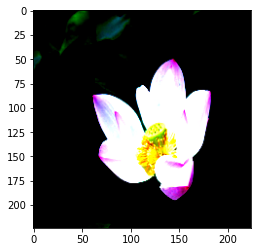

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


motorbike


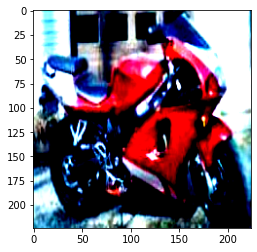

car


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


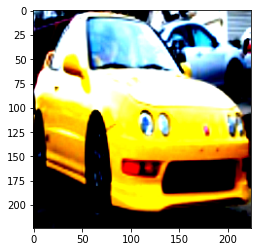

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


airplane


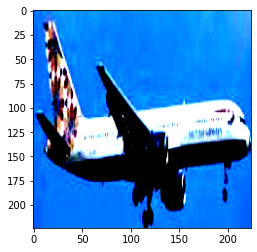

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


person


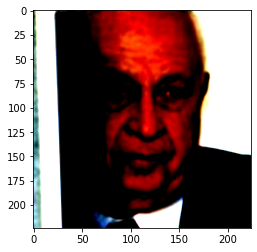

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


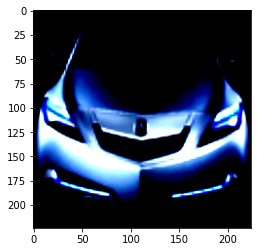

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog


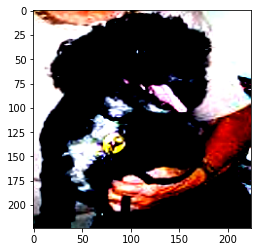

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


person


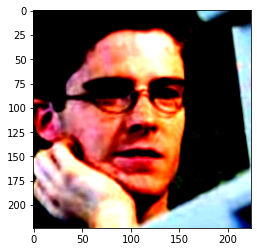

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cat


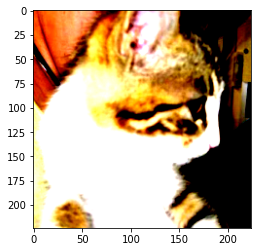

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


person


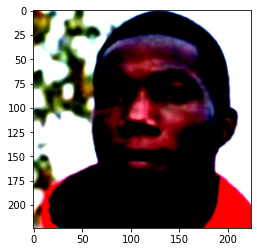

In [0]:
# visualize dataset
for images, labels in train_loader:
  for i in range(10):
    image = np.array(images[i]).transpose(1, 2, 0)
    print(classes[labels[i].item()])
    plt.imshow(image)
    plt.show()

  break

In [0]:
def make_conv_bn_relu(in_channels, out_channels, kernel_size=3, stride=1, padding=1):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size,  stride=stride, padding=padding, bias=False),
        nn.BatchNorm2d(out_channels),
        nn.LeakyReLU(inplace=True, negative_slope=0.2))

def make_transconv_bn_relu(in_channels, out_channels, kernel_size=3, stride=2, padding=0):
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size=kernel_size,  stride=stride, padding=padding, bias=False),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True))

def make_transconv_tanh_final(in_channels, out_channels, kernel_size=3, stride=2, padding=0):
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size=kernel_size,  stride=stride, padding=padding, bias=False),
        nn.Tanh())





In [0]:
inception = models.inception_v3(pretrained=True)
inception

In [0]:
# binarization
 class signet(nn.Module):
    def __init__(self):
        super().__init__()
        

        
    def forward(self, x):
        # Pass the input tensor through each of our operations

        
        return torch.sign(x)


In [0]:
new_mod = nn.Sequential(OrderedDict([
                                     ('down1', make_conv_bn_relu(3, 64, kernel_size=3, stride=2, padding=1)),
                                     ('down2', make_conv_bn_relu(64, 128, kernel_size=3, stride=2, padding=1)),
                                     ('down3', make_conv_bn_relu(128, 256, kernel_size=3, stride=2, padding=1)),
                                     ('down4', make_conv_bn_relu(256, 64, kernel_size=1, stride=1, padding=0)),
                                      ('binary', nn.Sequential(nn.Tanh(), signet(), nn.ReLU())),
                                     ('up',  make_conv_bn_relu(64, 256, kernel_size=1, stride=1, padding=0)),
                                     ('up1', make_transconv_bn_relu(256, 128, kernel_size=2, stride=2,padding=0)),
                                     ('up2', make_transconv_bn_relu(128, 64, kernel_size=2, stride=2, padding=0)),
                                     ('up3', make_transconv_tanh_final(64, 3, kernel_size=2, stride=2, padding=0))
]))
new_mod.cuda()

Sequential(
  (down1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down4): Sequential(
    (0): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slop

In [0]:
class Concat(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, tensor_list, dim):
        return torch.cat(tensor_list, dim=dim)
    
    pass

class Split(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, in_tensor, split_list, dim):
        return torch.split(in_tensor, split_list, dim)
    
    pass

class Quantize(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return torch.sign(x)
    pass

class Binarize(nn.Module):
    def __init__(self):
        super().__init__()
        self.tanh = nn.Tanh()
        self.quantize = Quantize()

    def forward(self, x):
        x = self.tanh(x)
        x = self.quantize(x)
        return x
    pass

class Add(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x, y):
        return x+y
    pass

class Fire(nn.Module):
    def __init__(self, squeeze_input_size, squeeze_output_size, expand1x1_output_size, expand3x3_output_size):
        super().__init__()
        # layers of neural net 
        
        
        self.squeeze = nn.Conv2d(squeeze_input_size, squeeze_output_size, kernel_size=(1, 1), stride=(1, 1))
        self.squeeze_activation = nn.ReLU(inplace=True)
        
        self.expand1x1 = nn.Conv2d(squeeze_output_size, expand1x1_output_size, kernel_size=(1, 1), stride=(1, 1))
        self.expand1x1_activation = nn.ReLU(inplace=True)
        
        self.expand3x3 = nn.Conv2d(squeeze_output_size, expand3x3_output_size, kernel_size=(3,3), stride=(1, 1), padding=(1, 1))
        self.expand3x3_activation = nn.ReLU(inplace=True)
        
        self.concat = Concat()
        pass
    
    def forward(self, x):
        
        x = self.squeeze(x)
        x = self.squeeze_activation(x)
        
        y = self.expand1x1(x)
        y = self.expand1x1_activation(y)
        
        z = self.expand3x3(x)
        z = self.expand3x3_activation(z)
        
        return self.concat((y,z), dim=1)
      
    pass

class FireTranspose(nn.Module):
    def __init__(self, expand1x1_input_size, expand3x3_input_size, squeeze_input_size, squeeze_output_size):
        super().__init__()
        
        self.expand1x1_input_size = expand1x1_input_size
        self.expand3x3_input_size = expand3x3_input_size
        
        # layers of neural net 
        self.split = Split()
        self.expand1x1 = nn.Conv2d(expand1x1_input_size, squeeze_input_size, kernel_size=(1, 1), stride=(1, 1))
        self.expand1x1_activation = nn.ReLU(inplace=True)
        
        self.expand3x3 = nn.Conv2d(expand3x3_input_size, squeeze_input_size, kernel_size=(3,3), stride=(1, 1), padding=(1, 1))
        self.expand3x3_activation = nn.ReLU(inplace=True)
        
        self.add = Add()
        self.squeeze = nn.Conv2d(squeeze_input_size, squeeze_output_size, kernel_size=(1, 1), stride=(1, 1))
        self.squeeze_activation = nn.ReLU(inplace=True)
        
        pass
    
    def forward(self, x):
        y, z = self.split(x, (self.expand1x1_input_size, self.expand3x3_input_size), dim=1)
        
        y = self.expand1x1(y)
        y = self.expand1x1_activation(y)
        
        z = self.expand3x3(z)
        z = self.expand3x3_activation(z)
        
        w = self.add(y, z)
        w = self.squeeze(w)
        w = self.squeeze_activation(w)
    
        return w
      
    pass






In [0]:
# original
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        squeezenet = models.squeezenet1_1(pretrained=True)
        self.l0 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
        self.l0.load_state_dict(squeezenet.features[0].state_dict())
        self.l1 = nn.ReLU(inplace=True)
        self.l2 = nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True)
        self.b1 = nn.BatchNorm2d(64)
        self.l3 = Fire(64, 16, 64, 64)
        self.l3.load_state_dict(squeezenet.features[3].state_dict())
        self.b2 = nn.BatchNorm2d(128)
        self.l4 = Fire(128, 16, 64, 64)
        self.l4.load_state_dict(squeezenet.features[4].state_dict())
        self.l5 = nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True)
        self.b3 = nn.BatchNorm2d(128)
        self.l6 = Fire(128, 32, 128, 128)
        self.l6.load_state_dict(squeezenet.features[6].state_dict())
        self.b4 = nn.BatchNorm2d(256)
        self.l7 = Fire(256, 32, 128, 128)
        self.l7.load_state_dict(squeezenet.features[7].state_dict())
        self.b5 = nn.BatchNorm2d(256)
        self.l8 = nn.Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
        self.l9 = nn.ReLU(inplace=True)
        self.l10 = Binarize()
        self.l11 = nn.Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
        self.l12 = nn.ReLU(inplace=True)
        self.b6 = nn.BatchNorm2d(256)
        self.l13 = FireTranspose(128, 128, 32, 256)
        self.b7 = nn.BatchNorm2d(256)
        self.l14 = FireTranspose(128, 128, 32, 128)
        self.b8 = nn.BatchNorm2d(128)
        self.l15 = nn.ConvTranspose2d(128, 128, kernel_size=3, stride=2)
        self.l16 = nn.ReLU(inplace=True)
        self.b9 = nn.BatchNorm2d(128)
        self.l17 = FireTranspose(64, 64, 16, 128)
        self.b10 = nn.BatchNorm2d(128)
        self.l18 = FireTranspose(64, 64, 16, 64)
        self.b11 = nn.BatchNorm2d(64)
        self.l19 = nn.ConvTranspose2d(64, 64, kernel_size=3, stride=2)
        self.l20 = nn.ReLU(inplace=True)
        self.b12 = nn.BatchNorm2d(64)
        self.l21 = nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2)
        self.l22 = nn.Tanh()
    def forward(self, x):
        
        x = self.l0(x)
        x = self.l1(x)
        x = self.l2(x)
        x = self.b1(x)
        x3 = self.l3(x)
        x = self.b2(x3)
        x4 = self.l4(x)
        x = x3+x4
        x = self.l5(x)
        x = self.b3(x)
        x6 = self.l6(x)
        x = self.b4(x6)
        x7 = self.l7(x)
        x = x6+x7
        x = self.b5(x)
        x = self.l8(x)
        x = self.l9(x)
        x = self.l10(x)
        x = self.l11(x)
        x12 = self.l12(x)
        x = self.b6(x12)
        x13 = self.l13(x)
        x = x12+x13
        x = self.b7(x)
        x = self.l14(x)
        x = self.b8(x)
        x = self.l15(x)
        x16 = self.l16(x)
        x = self.b9(x16)
        x17 = self.l17(x)
        x = x16+x17
        x = self.b10(x)
        x = self.l18(x)
        x = self.b11(x)
        x = self.l19(x)
        x = self.l20(x)
        x = self.b12(x)
        x = self.l21(x)
        x = self.l22(x)
        return x
    
new_mod = Autoencoder()



new_mod.cuda()

Autoencoder(
  (l0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
  (l1): ReLU(inplace=True)
  (l2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (b1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l3): Fire(
    (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
    (squeeze_activation): ReLU(inplace=True)
    (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
    (expand1x1_activation): ReLU(inplace=True)
    (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (expand3x3_activation): ReLU(inplace=True)
    (concat): Concat()
  )
  (b2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l4): Fire(
    (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
    (squeeze_activation): ReLU(inplace=True)
    (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
    (expand1x1_activation): ReLU(inplace=True)
    (expan

In [0]:
images, labels  = next(iter(train_loader))
import time
t1 = time.time()
out = new_mod(images.cuda())
print(time.time()-t1)
out.shape

0.022833824157714844


torch.Size([32, 3, 224, 224])

In [0]:
# freze traning weight in feature layer
la = [new_mod.l0, new_mod.l1, new_mod.l2, new_mod.l3, new_mod.l4, new_mod.l5, new_mod.l6, new_mod.l7]
for layers in la:
  for layer in layers.parameters():
    layer.requires_grad = True

for layer in new_mod.l7.parameters():
  print(layer.requires_grad)

    

True
True
True
True
True
True


In [0]:
new_mod.l0.require_grad

AttributeError: ignored

In [0]:
# loss and optimiser
loss = nn.MSELoss()
optimizer = optim.Adam(new_mod.parameters(), lr=0.001)
model = NeuralHelper(new_mod, loss, optimizer)

In [0]:
model = NeuralHelper(new_mod, loss, optimizer)
t1 = time.time()
model.train(train_loader, valid_loader, 1)

print(time.time()-t1)

Epoch: 1/1..
Traning loss =  0.5059407079542005
Validation loss =  0.4894065288826823
77.03868436813354


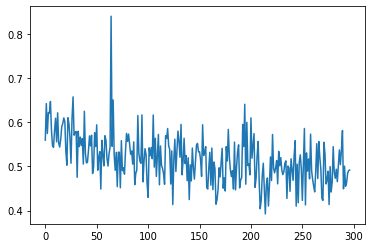

In [0]:
plt.plot(model.valid_loss_list)

In [0]:
squeezenet

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


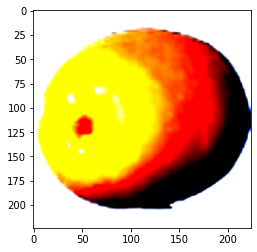

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


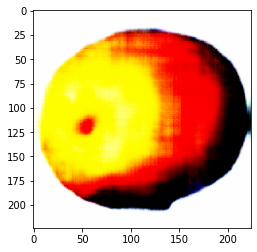

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


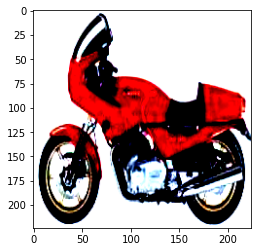

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


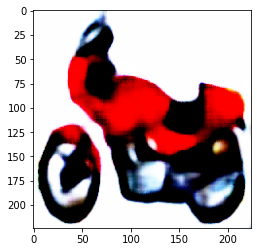

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


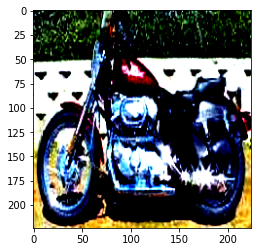

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


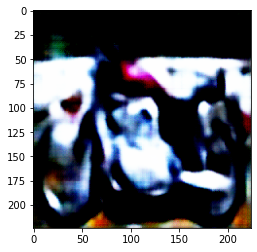

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


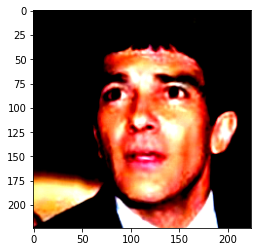

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


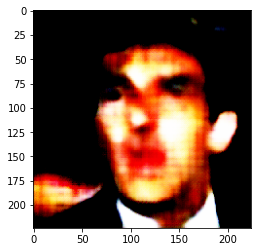

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


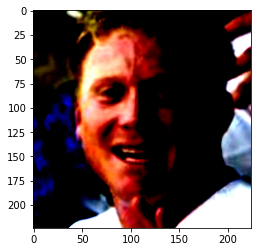

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


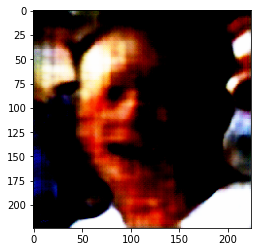

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


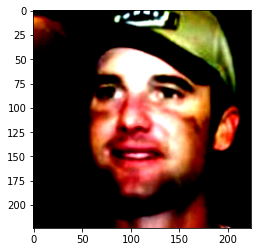

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


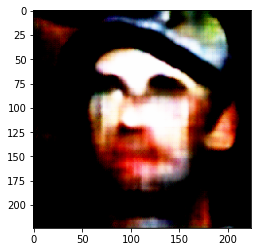

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


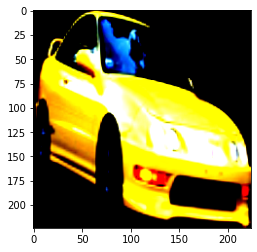

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


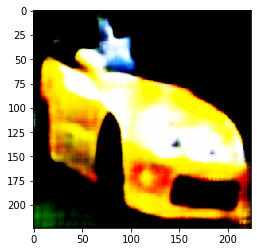

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


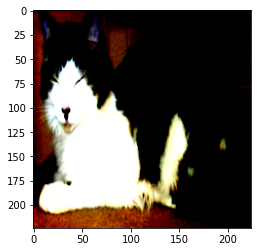

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


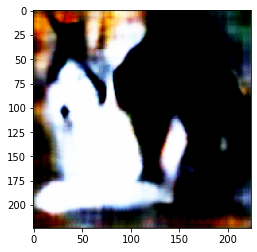

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


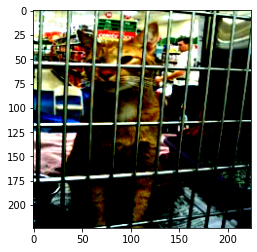

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


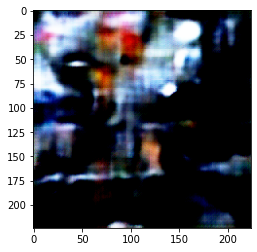

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


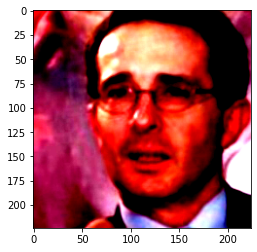

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


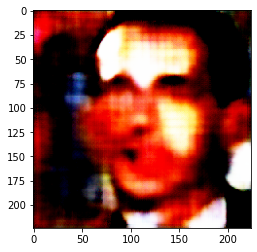

In [0]:
images, labels  = next(iter(train_loader))


out = new_mod(images.cuda())


# visualize dataset

for i in range(10):
  print("new img")
  image = np.array(images[i]).transpose(1, 2, 0)
  plt.imshow(image)
  plt.show()

  image = np.array(out[i].cpu().detach().numpy()).transpose(1, 2, 0)
  plt.imshow(image)
  plt.show()





/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Autoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Fire. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Concat. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Binarize. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/di

In [0]:
model.train(train_loader, valid_loader, 50)
model.save("m3")
files.download("m3")

Epoch: 1/50..
Traning loss =  0.5065597477796916
Validation loss =  0.4764525946229696
Epoch: 2/50..
Traning loss =  0.5033664070271157
Validation loss =  0.4806721359491348
Epoch: 3/50..
Traning loss =  0.4980580877613377
Validation loss =  0.4725317945703864
Epoch: 4/50..
Traning loss =  0.4994727439171559
Validation loss =  0.48409926891326904
Epoch: 5/50..
Traning loss =  0.4928855388551145
Validation loss =  0.47430004365742207
Epoch: 6/50..
Traning loss =  0.49674400928858164
Validation loss =  0.474597898311913
Epoch: 7/50..
Traning loss =  0.49310888325845875
Validation loss =  0.4767142739146948
Epoch: 8/50..
Traning loss =  0.49009907245635986
Validation loss =  0.4737713271752
Epoch: 9/50..
Traning loss =  0.4902790651128099
Validation loss =  0.4779409086331725
Epoch: 10/50..
Traning loss =  0.48829125085392516
Validation loss =  0.4759752284735441
Epoch: 11/50..
Traning loss =  0.48603238930573334
Validation loss =  0.46844950318336487
Epoch: 12/50..
Traning loss =  0.4836

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Autoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Fire. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Concat. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Binarize. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/di

MessageError: ignored

In [0]:
model.train(train_loader, valid_loader, 50)
model.save("m4")
files.download("m4")

In [0]:
model.train(train_loader, valid_loader, 50)
model.save("m5")
files.download("m5")

In [0]:
model.train(train_loader, valid_loader, 50)
model.save("m6")
files.download("m6")

Epoch: 1/50..
Traning loss =  0.4668536598617966
Validation loss =  0.4610741678625345
Epoch: 2/50..
Traning loss =  0.4662866304049621
Validation loss =  0.45946408342570066
Epoch: 3/50..
Traning loss =  0.4639677550341632
Validation loss =  0.4525500889867544
Epoch: 4/50..
Traning loss =  0.4641719465320175
Validation loss =  0.45596779230982065
Epoch: 5/50..
Traning loss =  0.46410998122112174
Validation loss =  0.45459025725722313
Epoch: 6/50..
Traning loss =  0.46284640640825836
Validation loss =  0.45736180897802114
Epoch: 7/50..
Traning loss =  0.4643489989074501
Validation loss =  0.45652039628475904
Epoch: 8/50..
Traning loss =  0.4622363517413268
Validation loss =  0.46397237945348024
Epoch: 9/50..
Traning loss =  0.4620658270410589
Validation loss =  0.45874814596027136
Epoch: 10/50..
Traning loss =  0.46406594353753167
Validation loss =  0.4624151196330786
Epoch: 11/50..
Traning loss =  0.46339163603009403
Validation loss =  0.4486293336376548
Epoch: 12/50..
Traning loss = 

In [0]:
model.train(train_loader, valid_loader, 50)
model.save("m7")
files.download("m7")

In [0]:
model.train(train_loader, valid_loader, 50)
model.save("m8")
files.download("m8")

In [0]:
model.train(train_loader, valid_loader, 50)
model.save("m9")
files.download("m9")

In [0]:
model.train(train_loader, valid_loader, 50)
model.save("m10")
files.download("m10")